# Similarity & Distance

### Jaccard Similarity

The Jaccard similarity, denoted $J(A,B)$ of two sets A and B is $|A \bigcap B| / |A \bigcup B|$, ie, the ratio of
the cardinality of the intersection of sets A and B and the cardinality of their
union. Or in less mathy terms: $(\text{number of observations in both sets}) / (\text{number in either set})$

**Example 1** 

In [1]:
A = c(0, 1, 2, 5, 6, 8, 9)
B = c(0, 2, 3, 4, 5, 7, 9)

In [2]:
# creating a function for the Jaccard similarity
jaccard_sim <- function(setA, setB) {
    AandB <- intersect(setA, setB)
    AorB <- union(setA, setB)
    return(length(AandB) / length(AorB))
}

**Example 2**

In [3]:
C = c(0, 1, 2, 3, 4, 5)
D = c(6, 7, 8, 9, 10)

In [4]:
jaccard_sim(C, D)

[1] 0

In [5]:
E = c('cat', 'dog', 'hippo', 'monkey')
F = c('monkey', 'rhino', 'ostrich', 'salmon')

In [6]:
jaccard_sim(E,F)

[1] 0.1428571

## Distances

*Conditions*

1. $d(x,y) ≥ 0$: distances cannot be negative
2. $d(x,y) = d(y,x)$: distances are symmetric
3. $d(x,y) = 0$ if and only if $x=y$: Distances are positive, except for the
distance between a point and itself.
4. $d(x,y) ≤d(x,z) + d(z,y)$: the triangle inequality

### Jaccard Distance

The Jaccard distance of two sets is simply $1-J(A,B)$.

### $L_r$-Norms

Denoted as $|| x-y ||_r$, represents the $r-norm$ distance between two vectors $x = (x_1, x_2, ..., x_n)$ and $y = (y_1, y_2, ... , y_n)$

#### Manhatten Distance ($L_1$-Norm)

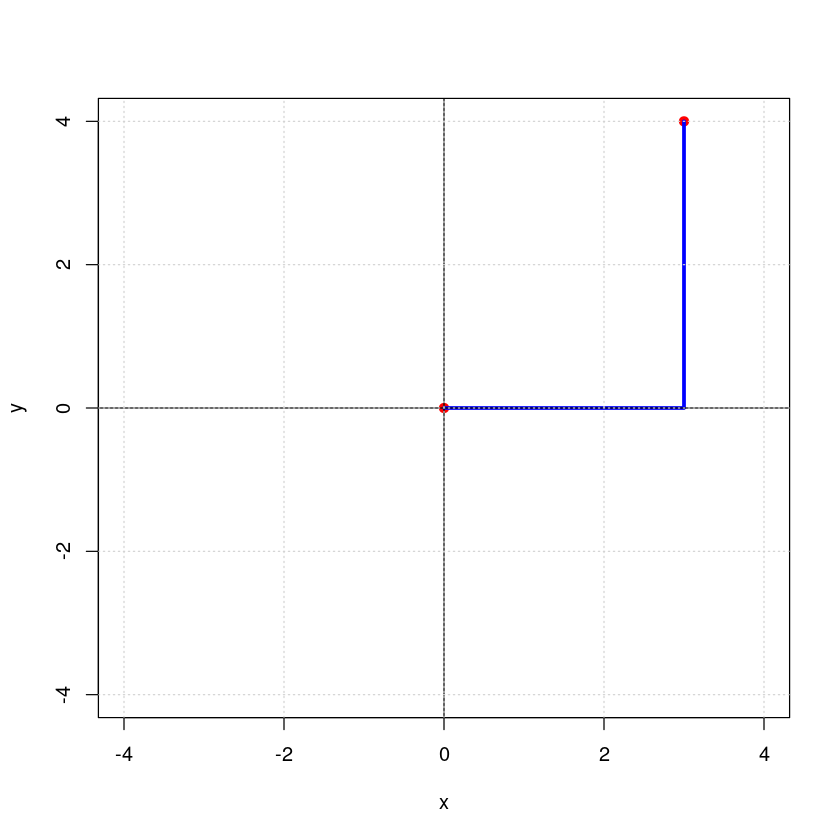

In [7]:
# initialize a plot
plot(c(-4, 4), c(-4, 4), type = "n", xlab = "x", ylab = "y")

# plot points & lines
points(x = c(0, 3), y = c(0, 4), col = "red", pch = 19)
lines(x = c(0, 3, 3, 3), y = c(0, 0, 0, 4), col = "blue", lwd = 3)
abline(h = 0, v = 0)
grid()

In [8]:
x <- c(0,0)
y <- c(3, 4)

dist(rbind(x,y), method = "minkowski", p=1) # note the organization of the data (each row represents a point/vector) 
# for this function

  x
y 7

#### Euclidean Distance ($L_2$-Norm)

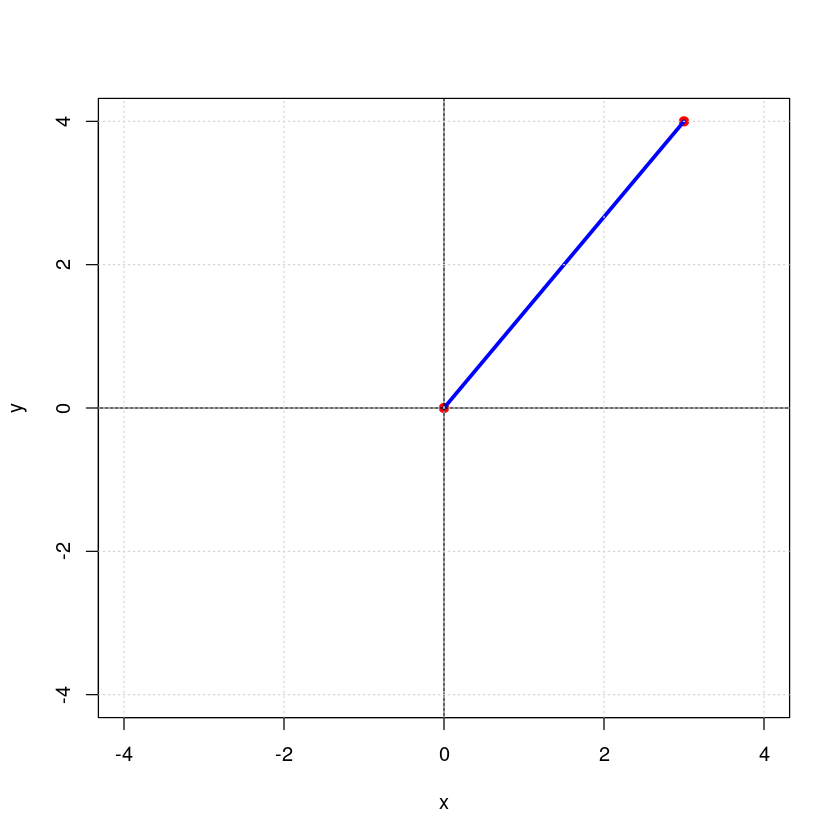

In [9]:
# initialize a plot
plot(c(-4, 4), c(-4, 4), type = "n", xlab = "x", ylab = "y")

# plot points & lines
points(x = c(0, 3), y = c(0, 4), col = "red", pch = 19)
lines(x = c(0, 3), y = c(0, 4), col = "blue", lwd = 3)
abline(h = 0, v = 0)
grid()

$$d_E(x,y) = \sqrt{(x_1 −y_1)^2 + (x_2 −y_2)^2 + ... + (x_n −y_n)^2} = \sqrt{\sum_{i=1}^n(x_i −y_i)^2}$$

**Example 1**

In [10]:
x <- c(1,3)
y <- c(2,6)

$d_E(x,y)$ = ??

**Example 2**

In [11]:
x2 <- sample(0:9, 7, replace = T)
y2 <- sample(0:9, 7, replace = T)
x2
y2

[1] 6 1 1 2 2 5 7

[1] 5 4 4 9 8 5 9

In [12]:
dist(rbind(x2,y2), method = "euclidean")
dist(rbind(x2,y2), method = "minkowski", p=2)

        x2
y2 10.3923

        x2
y2 10.3923

In [13]:
dist(rbind(x,y), method = "euclidean")
sqrt(10)

         x
y 3.162278

[1] 3.162278

In [14]:
# downside of euclidean method (magnitude of the dimensions)

#### $L_r$-Norm

$\big(\sum_{i=1}^n|x_i −y_i|^r\big)^{1/r}$, where $r$ is any constant (not including $\infty$).

#### $L_\infty$-Norm

$\max|x_i − y_i|$ over all dimensions $i$

In [15]:
dist(rbind(x,y), method = "maximum")

  x
y 3

In [16]:
abs(3-6)

[1] 3

For more information on the considerations of p values, check this page out: https://www.reddit.com/r/math/comments/7hogva/what_do_higher_norms_than_l2_really_mean_for_a_2d/

If it feels like the discussion goes over your head, don't worry. Unless you're dealing with Machine Learning, the most commonly used p values are 1, 2, and $\infty$.

### Angular / Cosine Distance

<div>
<img src="../img/3_points.png" width=50%/>
</div>

<div>
<img src="../img/vectors.png" width=50%/>
</div>

<div>
<img src="../img/ang_dist.png" width=50%/>
</div>

$$\cos(\theta) = \frac{\sum_{i=1}^n(x_iy_i)}{\sqrt{\sum_{i=1}^nx_i^2}\sqrt{\sum_{i=1}^ny_i^2}}$$

$$d_A(x,y) = \cos^{−1}(\cos(\theta))/\pi$$

**Example 1**

Let $x = [0,1]$ and $y = [1,0]$. What is the angular distance?

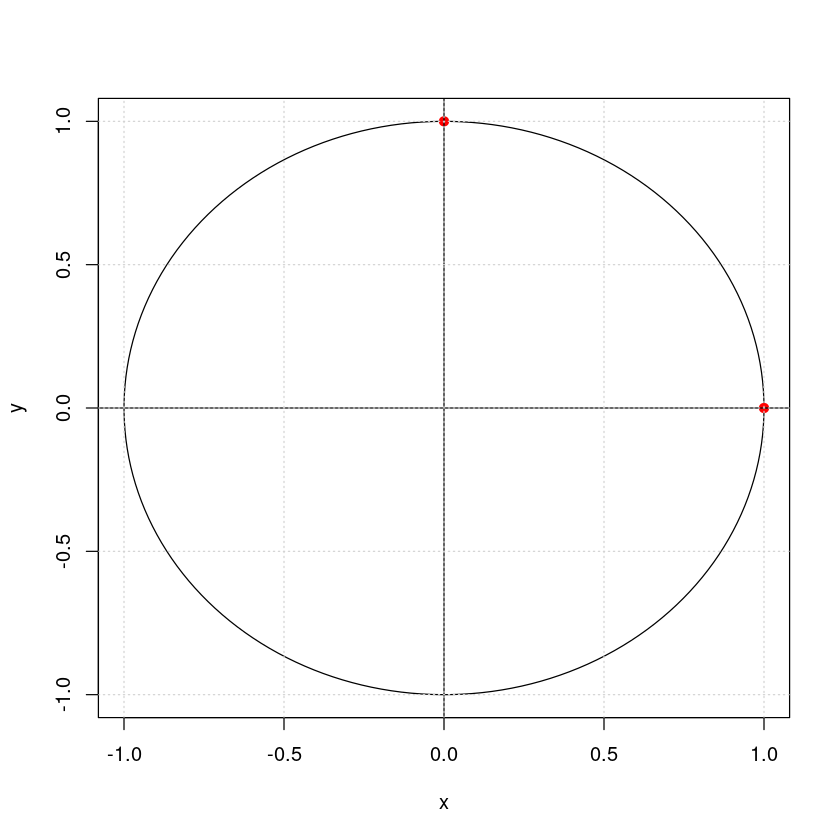

In [17]:
# initialize a plot
plot(c(-1, 1), c(-1, 1), type = "n", xlab = "x", ylab = "y")

# prepare "circle data"
radius = 1
center_x = 0
center_y = 0
theta = seq(0, 2 * pi, length = 200) # angles for drawing points around the circle

# draw the circle
lines(x = radius * cos(theta) + center_x, y = radius * sin(theta) + center_y)
points(x = c(0, 1), y = c(1, 0), col = "red", pch = 19)
abline(h = 0, v = 0)
grid()

$d_A = 1/2$

**Example 2**

Let $x = [0,0,1,1,1]$ and $y = [1,0,0,1,1]$. What is the angular distance?

In [18]:
x <- c(0, 0, 1, 1, 1)
y <- c(1, 0, 0, 1, 1)

$\cos(\theta) = ??$

In [19]:
cos <- NA
arc_c <- acos(cos)
dA <- arc_c / pi
dA

[1] NA

$d_A = ??$

### Hamming Distance

**Example**

In [20]:
x = c("ATTAAG")
y = c("CTTAG")
z = c("ATTAA")

In [21]:
adist(x,y)

2


In [22]:
adist(y, z)

2


In [23]:
x <- c('aa', 'bb', 'cc', 'dd')
y <- c('aa', 'bb', 'cc', 'dd')

In [24]:
adist(x,y)

0,2,2,2
2,0,2,2
2,2,0,2
2,2,2,0


In [25]:
sum(x != y)

[1] 0

For more on pros/cons of distance metrics, check this page out: https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa

## Assignment

Let $x = [2, 3]$, $y = [3, 2]$, and $z = [6, 4.2]$.

1. Create a function to calculate the $L_r$−norm for any value of r, including $\infty$, on two n-dimenstional
vectors of any size.

2. Use the function from #1 to calculate the Euclidean distances between each pair of vectors. Confirm your results to one of the functions used in lab. 

    Compare the distances between each pair. Which one is the smallest? Which one is the largest? (You can use inequalities to show ordering.) 

3. Create a function to calculate the angular distance between two vectors of any length. 

$$\cos(\theta) = \frac{\sum_{i=1}^n(x_iy_i)}{\sqrt{\sum_{i=1}^nx_i^2}\sqrt{\sum_{i=1}^ny_i^2}}$$
$$d_A(x,y) = \cos^{−1}(\cos(\theta))/\pi$$

4. Use the function from #3 to calculate the angular distances between each pair of vectors. Confirm your results to one of the functions used in lab. 

    Compare the distances between each pair. Which one is the smallest? Which one is the largest? (You can use inequalities to show ordering.) 

5. Now compare the ordering of distances between both methods. Discuss any pitfalls you notice in either or both of the distance metrics. Feel free to plot the 3 points to aid you in visualizing any pitfalls. 

6. From the lecture notes, please explain in your own words what the curse of dimensionality means and what could be done to overcome it when analyzing high-dimensional data.